<a href="https://colab.research.google.com/github/HamzaF02/CreditCardFraud/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##How to run:
To run this notebook you need to either download the dateset from this link "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud" from kagglewebsite  or create your own kaggle key and use it in the colab.

In [ ]:
!pip install -q kaggle

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 97% 64.0M/66.0M [00:03<00:00, 24.0MB/s]
100% 66.0M/66.0M [00:03<00:00, 17.3MB/s]


In [ ]:
!unzip creditcardfraud

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


#Initial data insight and manipulation

###Checking DataFrame

In [ ]:
data = pd.read_csv("creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###Normalizing the features.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

#Exploatory Data Analysis(EDA)

We do analysis on the dataset to get more insight....

---






Starting with looking at the ratio between frauds and non frauds

Class 0(Non-fraud):  284315
Class 1(Fraud)....:  492
Proportion: 577.88 : 1


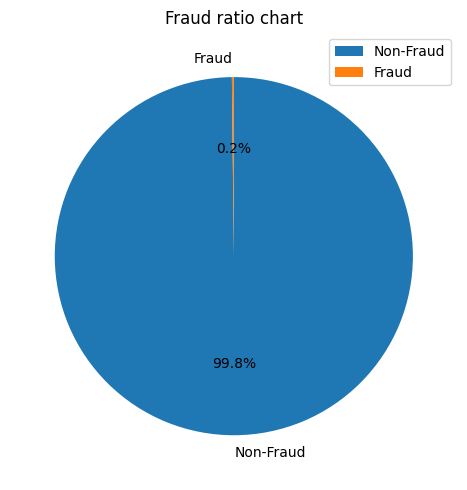

In [ ]:
# the code to count the number of examples of each class(fraud and non-fraud)
class_counts = data['Class'].value_counts()

print('Class 0(Non-fraud): ', class_counts[0])
print('Class 1(Fraud)....: ', class_counts[1])
print('Proportion:', round(class_counts[0] / class_counts[1], 2), ': 1')

FraudLabels = ["Non-Fraud","Fraud"]

plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=FraudLabels, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.title("Fraud ratio chart")
plt.legend(FraudLabels)
plt.tight_layout()
plt.show()

There seems to be a great imbalance between frauds and non frauds. This will be important when training the models.

### Looking at fraudulent and not fradulent transactions over time.

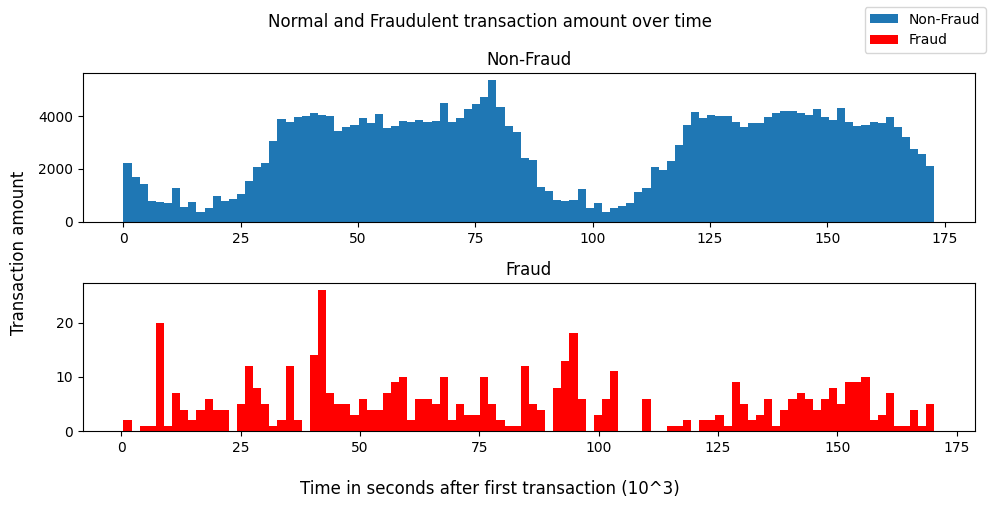

In [ ]:
fig, (plt1, plt2) = plt.subplots(2,figsize=(10, 5))

plt1.set_title("Non-Fraud")
plt1.hist(data.Time[data.Class == 0]/1000,100)

plt2.set_title("Fraud")
plt2.hist(data.Time[data.Class == 1]/1000,100,color="r")

fig.supxlabel("Time in seconds after first transaction (10^3)")
fig.supylabel("Transaction amount")
fig.legend(["Non-Fraud","Fraud"],loc='outside upper right')
fig.suptitle("Normal and Fraudulent transaction amount over time")
plt.tight_layout()
plt.show()

The Fraud seems to occur sporadically with high amount attemps in the same time frame.

### Looking for correlasjons between attributes and Frauds

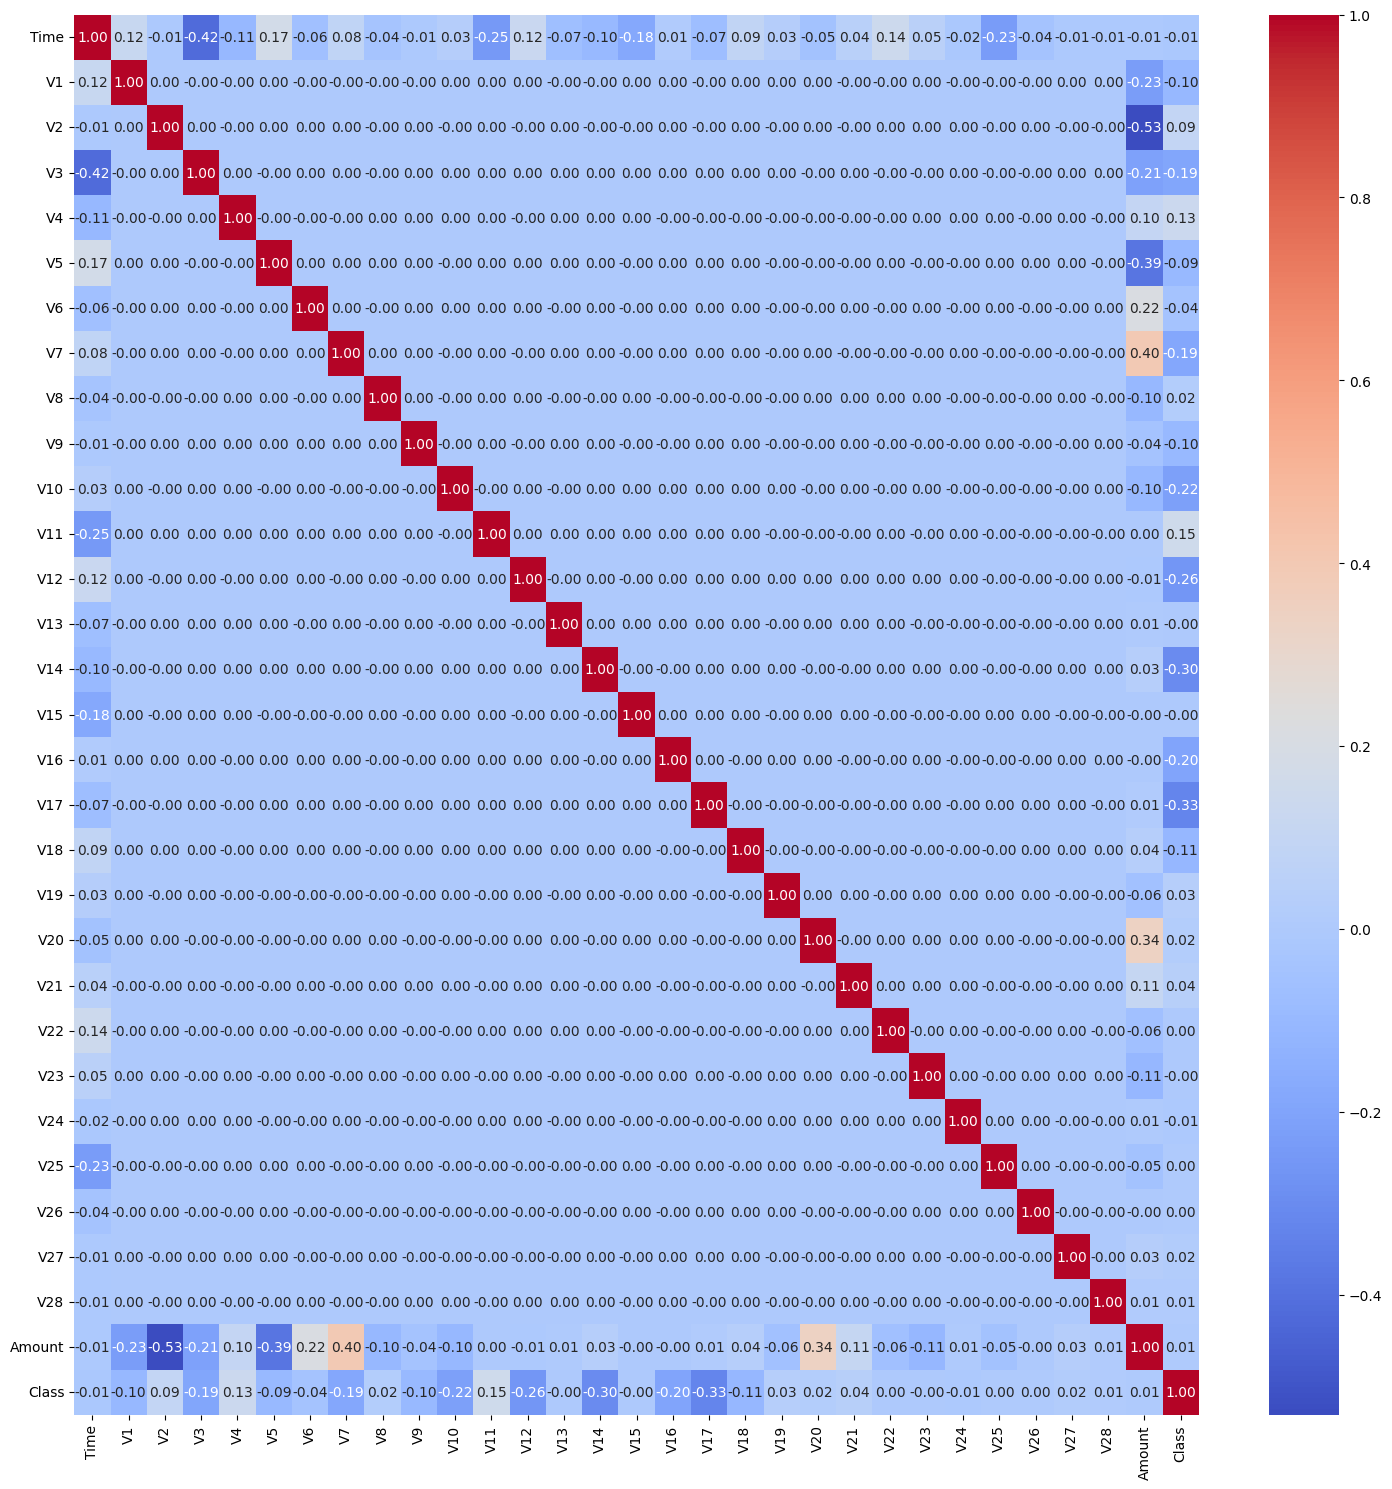

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.tight_layout()
plt.show()

V17, V14 and V12 have the highest correlation to whether or not a transaction was frauded. Plotting them will give more insight into their patterns, keeping in mind that they all have a negative correlation.

###Plotting the attributes with highest correlation

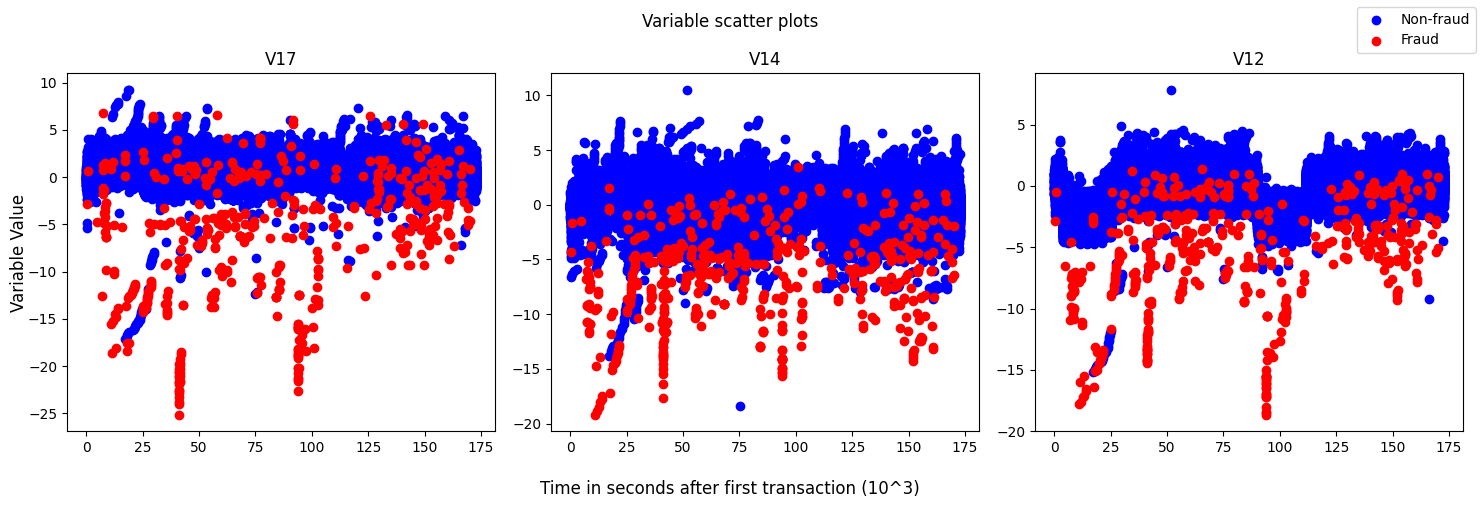

In [ ]:
fraud = data[data.Class == 1];
notFraud = data[data.Class == 0];

Values = ["V17","V14","V12"]
fig, splts = plt.subplots(1,3,figsize=(15, 5))


for i in range(len(Values)):
  splts[i].set_title(Values[i])
  splts[i].scatter(notFraud["Time"]/1000,notFraud[Values[i]], color="b")
  splts[i].scatter(fraud["Time"]/1000,fraud[Values[i]], color="r")

fig.supxlabel("Time in seconds after first transaction (10^3)")
fig.supylabel("Variable Value")
fig.suptitle("Variable scatter plots")
fig.legend(["Non-fraud","Fraud"],loc='outside upper right')
plt.tight_layout()

plt.show()

The fradulent transaction values tends to a be more negative and is farther away from the main clusters. This pattern is simmilar across all three plots.

#Training, Testing and Over Sampling

Prediction model implementation part

---



##Preparing training and testing data for models.

In [ ]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Splitting the data as training and testing datasets here.
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to training set to solve the class imbalance problem.
sm = SMOTE(random_state=27)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [ ]:
print(X_train_res.shape)
print(y_train_res.shape)

(454902, 30)
(454902,)


##Logistic Regression

Importing the evaluation metrics to score prediction models


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Confusuon matrix implementation
cm = confusion_matrix(y_test, y_pred_lr)

# Evaluate Logistic Regression
print("\nLogistic Regression:")
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", cm)


Logistic Regression:
Precision: 0.09897610921501707
Recall: 0.8877551020408163
F1-Score: 0.1780962128966223
AUC-ROC: 0.9369135667773019
Confusion Matrix:
 [[56072   792]
 [   11    87]]


##Naive-Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_nb = nb.predict(X_test)



# Evaluate Naive Bayes
print("Naive Bayes:")
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1-Score:", f1_score(y_test, y_pred_nb))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_nb))



Naive Bayes:
Precision: 0.14345114345114346
Recall: 0.7040816326530612
F1-Score: 0.2383419689119171
AUC-ROC: 0.8484181376546117


##Random-Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Confusuon matrix implementation
cm = confusion_matrix(y_test, y_pred_lr)

# Evaluate Random Forest
print("Random Forest:")
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", cm)

Random Forest:
Precision: 0.8736842105263158
Recall: 0.8469387755102041
F1-Score: 0.8601036269430051
AUC-ROC: 0.9233638728423278
Confusion Matrix:
 [[56072   792]
 [   11    87]]


##SVM

Using normal training data in stead of SMOTE altered data, as it will run indefinetly with the synthetic data

In [ ]:
from sklearn import svm

# Train SVM
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svc.predict(X_test)

# Evaluate SVM
print("\nSupport Vector Machine:")
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-Score:", f1_score(y_test, y_pred_svm))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_svm))


Support Vector Machine:
Precision: 0.6041666666666666
Recall: 0.29591836734693877
F1-Score: 0.3972602739726027
AUC-ROC: 0.64779211839491


##XGBoost

In [ ]:
from xgboost import XGBClassifier

# Train an XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
print("\nXGBoost:")
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_xgb))


XGBoost:
Precision: 0.8367346938775511
Recall: 0.8367346938775511
F1-Score: 0.8367346938775511
AUC-ROC: 0.9182266603884097
